# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset analysed within this report is the TMDb Movie database.

The data set contains over 10000 records of movies with 21 attributes. Most of the attributes in the dataset are self explanatory, however a description some salient attributes is given below:

* Popularity - A numeric value ranging from as low as 0 to 32 representing how popular the movie is
* Budget_Adj - A value of the budget for the movie adjusted to 2010 US dollars
* Revenue_Adj - A value of the revenue for the movie adjusted to 2010 US dollars
* Runtime - Duration of the movie in minutes
* Genres - All genres associated with the movie
* Release year - Year when the movie was released
* Homepage - A URL for a homepage for the movie
* Budjet - Unadjested budget
* Revenue - Unadjusted revenue

Other features include:
* Cast
* Overview (Synopsis)
* Original_Title
* Director


### Question(s) for Analysis
The analysis aims to answer the following:
1. How does movie budget correlate with commercial performance of the movie?
2. Which genre of movies are most popular year on year?
3. How does having a homepage affect popularity?

In [1]:
# !conda upgrade conda


In [2]:
# !pip install --upgrade matplotlib==3.4.0


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas matplotlib
#==0.25.0;

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)
Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages (3.3.4)


#### Restart Kernel after upgrading pandas


In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#display floats in full
pd.set_option('display.float_format', lambda x: '%.2f' % x)



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [5]:
%ls Database_TMDb_movie_data/

tmdb-movies.csv


In [6]:
df = pd.read_csv('data/Database_TMDb_movie_data/tmdb-movies.csv')
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,127642.28,0.00


In [7]:
# Get shape of data
df.shape

(10866, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


Some values are missing within the data around budget and revenue as seen below

In [10]:
#Movies with missing revenue = 6016 (more than half of this dataset) 
#Movies with missing budget = 5696 (more than half of this dataset) 
sum(df.revenue_adj == 0), sum(df.budget_adj == 0)

(6016, 5696)

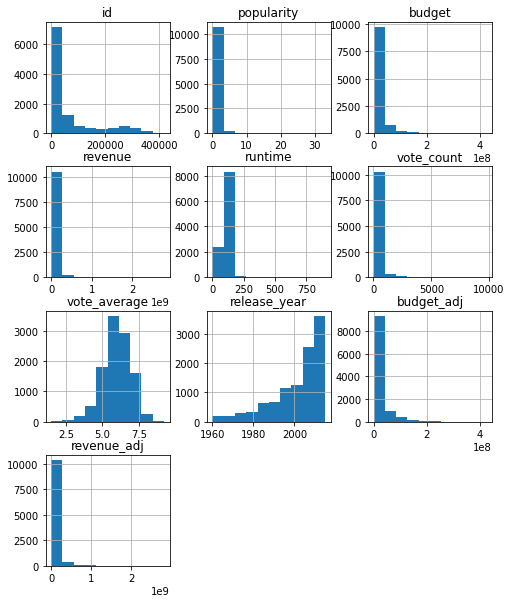

In [11]:
#Revenue and budget distribution skewed to the right due to missing values
df.hist(figsize=(8,10));

In [12]:
#duplicated records to be dropped = 1 (record 2090) 
dupes = df.duplicated()
df[dupes]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00


Some movies with the same title and director were found.
These records are likely re-released movies or errorneously duplicated movies.
(See below)

In [13]:
# Movies with the same title and director.. Possible re-release or errorneosly duplicated data
df[df[['original_title','director']].duplicated(keep=False) ].sort_values('original_title')


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1400,12244,tt0472033,2.85,30000000,48428063,9,Elijah Wood|John C. Reilly|Jennifer Connelly|C...,NaN,Shane Acker,When our world ended their mission began.,...,"When 9 first comes to life, he finds himself i...",79,Action|Adventure|Animation|Science Fiction|Thr...,Focus Films|Starz Animation|Relativity Media|T...,8/19/09,851,6.50,2009,30492013.02,49222304.26
6514,98622,tt0443424,0.13,0,0,9,NaN,http://www.shaneacker.com,Shane Acker,NaN,...,A rag doll fights a monster that has been stea...,11,Animation|Fantasy,NaN,4/21/05,49,7.30,2005,0.00,0.00
4337,56149,tt0109322,0.14,0,0,Bottle Rocket,Owen Wilson|Luke Wilson|Robert Musgrave|Elissa...,NaN,Wes Anderson,"They're not criminals, but everybody's got to ...",...,(The short film that inspired Wes Andersonâ€™s...,13,Comedy|Crime,NaN,1/20/94,26,6.90,1994,0.00,0.00
8547,13685,tt0115734,0.48,7000000,560069,Bottle Rocket,Luke Wilson|Owen Wilson|Lumi Cavazos|Andrew Wi...,NaN,Wes Anderson,"They're not really criminals, but everyone's g...",...,Upon his release from a mental hospital follow...,91,Comedy|Crime|Drama,Gracie Films|Columbia Pictures Corporation,2/21/96,128,6.70,1996,9731517.17,778617.30
4451,62214,tt1142977,1.05,39000000,81491068,Frankenweenie,Charlie Tahan|Winona Ryder|Catherine O'Hara|Ma...,http://disney.go.com/frankenweenie/,Tim Burton,The electrifying dog is back from beyond the g...,...,Young Victor conducts a science experiment to ...,87,Animation|Comedy|Family,Walt Disney Pictures|Tim Burton Animation Comp...,10/4/12,589,6.50,2012,37040026.97,77395675.81
7943,33914,tt0087291,0.34,0,0,Frankenweenie,Shelley Duvall|Daniel Stern|Barret Oliver|Jose...,NaN,Tim Burton,A comic twist on a classic tail!,...,When young Victor's pet dog Sparky (who stars ...,29,Comedy|Family,Walt Disney Pictures,12/14/84,53,6.60,1984,0.00,0.00
4063,28004,tt0359639,0.37,6000000,0,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,"Just as the southern matriarch, Madea buries h...",0,Comedy,NaN,1/25/02,49,5.90,2002,7273568.36,0.00
6701,16781,tt0455612,0.55,6000000,57231524,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,Based upon Tyler Perry's acclaimed stage produ...,110,Drama|Comedy|Romance,Lions Gate Films,2/24/06,63,6.00,2006,6490014.95,61905574.39
5202,246355,tt0495241,0.12,0,0,Saw,Leigh Whannell|Paul Moder|Katrina Mathers|Dean...,NaN,James Wan,NaN,...,Saw is an Australian nine-and-a-half-minute sh...,9,Crime|Thriller|Horror,Twisted Pictures,1/1/03,40,6.40,2003,0.00,0.00
7011,176,tt0387564,1.31,1200000,103911669,Saw,Cary Elwes|Danny Glover|Monica Potter|Michael ...,NaN,James Wan,Live or die. Make your choice.,...,Obsessed with teaching his victims the value o...,103,Horror|Mystery|Crime,Twisted Pictures|Evolution Entertainment|Saw P...,10/1/04,1135,7.10,2004,1385334.48,119960348.26


In [14]:
#Records for 2010 have the same budget/revenue and budget_adj/revenue_adj as seen below
budg_adj = df[(df.budget == df.budget_adj )  & ((df.budget>0 ) | (df.budget_adj>0))]
budg_adj

rev_adj = df[(df.revenue == df.revenue_adj )  & ((df.revenue>0 ) | (df.revenue_adj>0))]
adj = budg_adj.merge(rev_adj, how='outer')

adj



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,27205,tt1375666,9.36,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.90,2010,160000000.00,825500000.00
1,10138,tt1228705,5.70,200000000,623933331,Iron Man 2,Robert Downey Jr.|Gwyneth Paltrow|Don Cheadle|...,http://www.ironmanmovie.com/,Jon Favreau,"It's not the armor that makes the hero, but th...",...,With the world now aware of his dual life as t...,124,Adventure|Action|Science Fiction,Marvel Studios,4/28/10,4920,6.60,2010,200000000.00,623933331.00
2,12155,tt1014759,5.57,200000000,1025467110,Alice in Wonderland,Mia Wasikowska|Johnny Depp|Anne Hathaway|Helen...,http://disney.go.com/wonderland/,Tim Burton,You're invited to a very important date.,...,"Alice, an unpretentious and individual 19-year...",108,Family|Fantasy|Adventure,Walt Disney Pictures|Team Todd|Tim Burton Prod...,3/3/10,2853,6.30,2010,200000000.00,1025467110.00
3,44214,tt0947798,5.29,13000000,327803731,Black Swan,Natalie Portman|Mila Kunis|Vincent Cassel|Barb...,http://www.foxsearchlight.com/blackswan/,Darren Aronofsky,"In the era of personal branding, the scariest ...",...,"A ballet dancer wins the lead in ""Swan Lake"" a...",108,Drama|Mystery|Thriller,Fox Searchlight Pictures|Dune Entertainment|Pr...,12/2/10,2597,7.10,2010,13000000.00,327803731.00
4,12444,tt0926084,4.84,250000000,954305868,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,http://www.harrypotter.com,David Yates,One Wayâ€¦ One Fateâ€¦ One Hero.,...,"Harry, Ron and Hermione walk away from their l...",146,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,10/17/10,3467,7.40,2010,250000000.00,954305868.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,66195,tt1334553,0.14,0,14870,The Perfect Host,David Hyde Pierce|Clayne Crawford|Nathaniel Pa...,http://theperfecthostmovie.com/,Nick Tomnay,Dinner Parties Are A Dying Art.,...,A criminal on the run cons his way into the wr...,93,Comedy|Thriller|Crime,Splendid Film,7/1/10,47,5.80,2010,0.00,14870.00
278,50099,tt1578261,0.09,0,427628,Break Ke Baad,Deepika Padukone|Imran Khan|Sharmila Tagore|Sh...,http://www.bkbthefilm.com/,Danish Aslam,NaN,...,Abhay Gulati and Aaliya Khan have known each o...,120,Drama|Comedy|Romance|Foreign,Kunal Kohli Productions|Reliance Big Pictures,11/26/10,11,6.00,2010,0.00,427628.00
279,51764,tt1426320,0.07,0,5980,BearCity,Joe Conti|Gerald McCullouch|Stephen Guarino|Al...,http://www.bearcitythemovie.com,Douglas Langway,Romance can be hairy,...,"Set in New York's gay ""bear"" scene and taking ...",103,Comedy|Romance,TLA Releasing,6/8/10,10,5.50,2010,0.00,5980.00
280,55244,tt1621444,0.05,0,1339650,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,http://billcunninghamnewyork.com/,Richard Press,"He who seeks beauty, will find it.",...,Chronicles a man who is obsessively interested...,84,Documentary,First Thought Films,3/24/10,16,8.10,2010,0.00,1339650.00


The data in the overview column is too complex for this analysis and would be dropped.

Additionally, the tagline column will be dropped

In [15]:
# Values are too complicated for this analysis
df.overview.value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                    13
Wilbur the pig is scared of the end of the season, because he knows that come that time, he will end up on the dinner table. He hatches a plan with Charlotte, a spider that lives in his pen, to ensure that this will never happen.                                                                                                                                                                                                                                                  2
1960. The thrilling battles waged by a band of kids fr

In [16]:
df.tagline.value_counts()
# cast, keywords ,genres,production_companies, director

Based on a true story.                                         5
Two Films. One Love.                                           3
Be careful what you wish for.                                  3
You never forget your first love.                              2
How far would you go?                                          2
                                                              ..
He's in the will. She's in the way.                            1
You die in the game - you die for real.                        1
Grease is the word                                             1
The corporation as psychopath...                               1
A comedy about doing the right thing with the wrong person.    1
Name: tagline, Length: 7997, dtype: int64

In [17]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning


The data has 10866 records and 21 columns.
4 of the 21 columns are multi-valued with a pipe symbol (|) as a delimiter

2 columns within the data set have alternative columns storing similar value (budget and budget adj ; revenue and revenue_adj) - the budget and revenue columns will be dropped in favor of the adjusted variant. Also the overview and tagline columns will not be used in this analysis and will be dropped


Movies with missing budgets / revenue have value recorded as zero. Records with missing revenue will be dropped as revenue is used as dependent variable in this analysis


In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Drop unused columns / Drop missing revenue records

In [19]:
#drop unused columns
df.drop(['budget','revenue','overview','tagline'], axis = 1,inplace=True)

In [20]:
df.drop(df[df.revenue_adj==0].index, inplace=True)
df_bkup = df #Backup of cleaned df
df

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.67,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,6/21/66,74,7.50,1966,50385110.19,226643572.37
10828,5780,tt0061107,0.40,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.30,1966,20154044.08,87334191.00
10829,6644,tt0061619,0.40,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.90,1966,31258922.36,40308088.15
10835,5923,tt0060934,0.30,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.00,1966,80616176.31,134360293.85


Re-examine the distributions of records with focus on budget_adj and revenue_adj

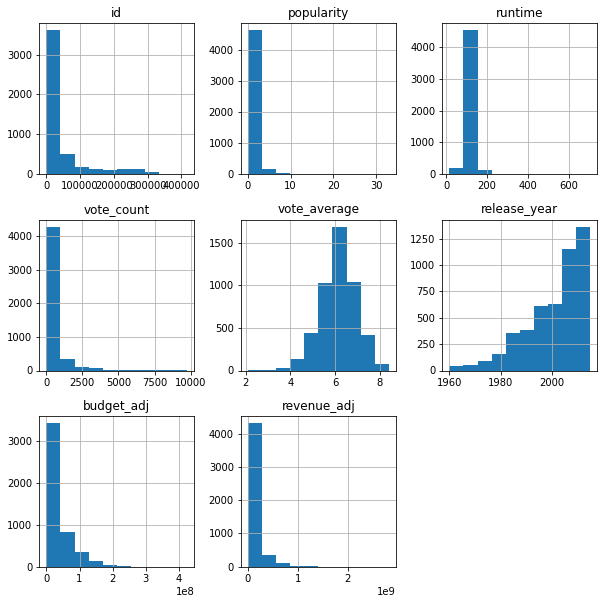

In [21]:
df.hist(figsize=(10,10));

Re-examine shape and structure of data set following data drops

In [22]:
df.shape

(4850, 17)

In [23]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.00,4850.00,4850.00,4850.00,4850.00,4850.00,4850.00,4850.00
mean,44575.00,1.05,107.96,436.22,6.15,2000.92,35161017.18,115077354.87
std,72361.41,1.36,21.11,806.42,0.80,11.57,43756717.05,198841916.05
min,5.00,0.00,15.00,10.00,2.10,1960.00,0.00,2.37
25%,8286.00,0.39,95.00,46.00,5.60,1994.00,2332077.79,10462622.84
50%,12154.50,0.68,104.00,147.00,6.20,2004.00,20328008.68,43927485.54
75%,43956.50,1.21,117.00,435.00,6.70,2010.00,49735160.27,131564380.46
max,417859.00,32.99,705.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


Cut dataframe according to popularity percentiles. 
Popularity will be cut into {very low, low, medium, high} values

In [24]:
#Cut dataframe according to popularity
bins = [0,0.39,0.68,1.21,32.99]
bin_labels = ['very low','low','medium','high']

df['popularity_rating'] =  pd.cut(df.popularity, bins=bins,labels=bin_labels)

In [25]:
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,high
2,262500,tt2908446,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,high
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,high
4,168259,tt2820852,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,high


----

Reviewing data to find relationships that would help in filling up missing budget_adj values

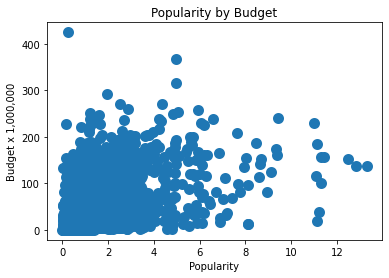

In [26]:
dfx = df[df.budget_adj>0]

plt.scatter(dfx.popularity.apply(lambda x: (x/10)+10 if x>10 else x), dfx.budget_adj/1000000 ,linewidths=5)
plt.xlabel('Popularity')
plt.ylabel('Budget x 1,000,000')
# plt.xticks(np.arange(df.budget_all.min(), df.budget_all.max()+1, 100000000))
# plt.yticks(np.arange(0,1.1), ['Flop', 'Success']);
plt.title('Popularity by Budget');

From the graph above (popularity by budget), we can observe a positive correlation between popularity and budget. 
Given this apparent correlation, the missing budgets will be filled according to popularity ratings in the section below

---

#### Fill budget values for movies with missing budget
For movies with missing budget, the mean_budget according to the popularity rating of that movie will be used as the budget.

#### New feature to be added :
    * budget_all : Budget values for all movies. Movies with missing budgets will have values of  the mean budget according to the popularity rating of the movie

#### Steps for feature creation
1. First get the mean budget according to popularity rating and store that in a new column `mean_budget`. `Popularity_rating` feature had been introduced earlier in the report and will be useful for the creation of this new feature

2. Create a new column `budget_all` 
    * populate column with `budget_adj` value for movies that have a budget
    * populate column with `mean_budget` value for movies with missing budget
    
    
3. Drop column `mean_budget`

4. Following this, `budget_all` will contain a budget value for all records



In [27]:
#mean budget by popularity rating
mean_pop = df.query('budget_adj > 0').groupby('popularity_rating').budget_adj.mean()
mean_pop_dict = mean_pop.to_dict()
mean_pop_dict

{'very low': 23246877.148215786,
 'low': 30614685.636745125,
 'medium': 41912824.65291075,
 'high': 69918951.96672036}

In [28]:
#Function to generate mean budget according to popularity rating
def mean_budget (popularity_rating):
    return mean_pop_dict[popularity_rating]

In [29]:
#Create column on for mean budget for each record
df['mean_budget'] = df.popularity_rating.apply(mean_budget)
df['mean_budget'] = df.mean_budget.astype(float)

In [30]:
#Create column for budget_all, initialize column with budget_adj values
df['budget_all'] = df.budget_adj
#For records that have missing budget (budget==0), populate budget_all with mean_budget by popularity rating
df.loc[ df.budget_adj==0 ,'budget_all'] = df.mean_budget
df.head(10)

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,mean_budget,budget_all
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,69918951.97,137999939.28
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,high,69918951.97,137999939.28
2,262500,tt2908446,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,high,69918951.97,101199955.47
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,high,69918951.97,183999919.04
4,168259,tt2820852,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,high,69918951.97,174799923.09
5,281957,tt1663202,9.11,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20,2015,124199945.35,490314247.02,high,69918951.97,124199945.35
6,87101,tt1340138,8.65,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80,2015,142599937.26,405355075.68,high,69918951.97,142599937.26
7,286217,tt3659388,7.67,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60,2015,99359956.28,547749654.31,high,69918951.97,99359956.28
8,211672,tt2293640,7.40,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50,2015,68079970.04,1064192016.80,high,69918951.97,68079970.04
9,150540,tt2096673,6.33,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.00,2015,160999929.16,785411574.70,high,69918951.97,160999929.16


In [31]:
#Drop mean_budget
df.drop(['mean_budget'], axis=1,inplace=True)

#### Add feature that indicates whether a movie is a commercial success or a flop
##### New Feature : Performance
###### Values below :
* **success** : revenue_adj > budget_all
* **flop** : revenue_adj <= budget_all

In [32]:
#Define values for performance according to formula above
perf = ['success' if (r - b)>0 else 'flop' for r,b in  zip(df.revenue_adj, df.budget_all)]

In [33]:
#Assign performance values to the column `performance`
df['performance'] = perf
df

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,budget_all,performance
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,high,137999939.28,success
2,262500,tt2908446,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,high,101199955.47,success
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,high,183999919.04,success
4,168259,tt2820852,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,high,174799923.09,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.67,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,6/21/66,74,7.50,1966,50385110.19,226643572.37,low,50385110.19,success
10828,5780,tt0061107,0.40,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.30,1966,20154044.08,87334191.00,low,20154044.08,success
10829,6644,tt0061619,0.40,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.90,1966,31258922.36,40308088.15,low,31258922.36,success
10835,5923,tt0060934,0.30,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.00,1966,80616176.31,134360293.85,very low,80616176.31,success


----
<a id='eda'></a>
## Exploratory Data Analysis



### 1. How does movie budget correlate with commercial performance of the movie?

In [34]:
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,budget_all,performance
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,high,137999939.28,success
2,262500,tt2908446,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,high,101199955.47,success
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,high,183999919.04,success
4,168259,tt2820852,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,high,174799923.09,success


Visualize relationship between variables

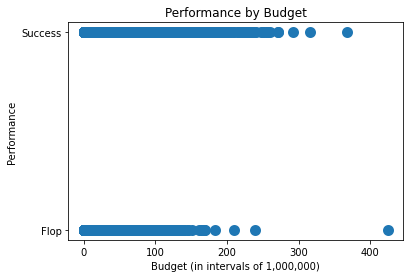

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

plt.scatter(df.budget_all/1000000, df.performance.apply(lambda x : 1 if x=='success' else 0) ,linewidths=5)
plt.xlabel('Budget (in intervals of 1,000,000)')
plt.ylabel('Performance')
# plt.xticks(np.arange(df.budget_all.min(), df.budget_all.max()+1, 100000000))
plt.yticks(np.arange(0,1.1), ['Flop', 'Success']);
plt.title('Performance by Budget');



Going in to more detail, visualize the relationship between budget and how much profit or loss is earned by the movie

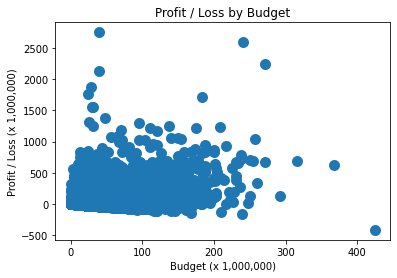

In [36]:
df.apply(lambda x: x['revenue_adj']-x['budget_all'], axis=1)

plt.scatter(df.budget_all/1000000, df.apply(lambda x: (x['revenue_adj']-x['budget_all'])/1000000, axis=1),linewidths=5)
plt.xlabel('Budget (x 1,000,000)')
plt.ylabel('Profit / Loss (x 1,000,000)')
# plt.xticks(np.arange(df.budget_all.min(), df.budget_all.max()+1, 100000000))
# plt.yticks(np.arange(0,1.1), ['Flop', 'Success']);
plt.title('Profit / Loss by Budget');

From the findings, we see a some what positive relationship between budget and commercial performance.
However the relationship is very weak and not the best indicator to predict commercial success or failure of a movie.

---

### 2. Which genre of movies are most popular year on year?

In [37]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df2 = df.copy() # copy df into a new dataframe for question 2
df2.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,budget_all,performance
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success


Split record for genre into multiple rows using explode

In [38]:
df2.genres = df2.genres.str.split('|')
df2 = df2.explode('genres')
df2.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,budget_all,performance
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,high,137999939.28,success


The count of rows increases to 12669

In [39]:
df2.shape

(12669, 20)

List out some genres with high popularity rating

In [40]:
df2[df2.popularity_rating=='high'].genres.value_counts()

Action             451
Drama              435
Comedy             389
Thriller           375
Adventure          367
Science Fiction    236
Fantasy            208
Family             196
Crime              189
Romance            181
Animation          120
Mystery            101
Horror              87
War                 42
Music               33
History             28
Western             13
Name: genres, dtype: int64

In [41]:
#Describe with 85th and 90th percentile
df2.describe([.75,.85,.90])

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_all
count,12669.00,12669.00,12669.00,12669.00,12669.00,12669.00,12669.00,12669.00,12669.00
mean,39895.37,1.12,108.45,482.34,6.13,2000.46,40295907.01,129551740.48,45996602.37
std,67413.12,1.49,21.77,870.84,0.79,11.56,47112577.76,215918416.58,43852201.72
min,5.00,0.00,15.00,10.00,2.10,1960.00,0.00,2.37,0.97
50%,11667.00,0.72,105.00,165.00,6.20,2003.00,25000000.00,50724275.36,30614685.64
75%,37495.00,1.28,118.00,493.00,6.70,2010.00,58249437.26,152628915.66,60196296.11
85%,75275.60,1.82,126.00,867.80,6.90,2012.00,84772893.46,250591956.24,84772893.46
90%,123553.00,2.35,132.00,1275.00,7.10,2013.00,104724227.73,346726502.50,104724227.73
max,417859.00,32.99,705.00,9767.00,8.40,2015.00,425000000.00,2827123750.41,425000000.00


Movies with top popularity will be drawn from the 90th percentile of popularity values grouped by release year

In [42]:
#90th percentile popularity per year
top_pop = df2.groupby('release_year').popularity.quantile(0.9)

**Add feature for most_popular to a copy of the dataframe.**

The feature `most_popular` is **true** if the genre is within the 90th percentile of popularity ratings for the year in which the movie was released. Otherwise it is  **false**

Add feature and view sample of new feature

In [43]:
#Add a new feature for most_popular
df3 = df2.copy()
df3.head()
df3['most_popular']= df3.apply(lambda x : x['popularity'] >= top_pop[x['release_year']], axis=1)
df3.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,budget_all,performance,most_popular
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success,True


Filter out most popular movies into a new dataframe

In [44]:
#Filter most popular movies
df4 = df3[df3.most_popular == True]
df4.head(2)

,id,imdb_id,popularity,original_title,cast,homepage,director,keywords,runtime,genres,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_rating,budget_all,performance,most_popular
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success,True
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,high,137999939.28,success,True


A list of movies genres with top popularity _(90th percentile per year)_ across the years

In [45]:
#Top popular genres across years
df4.genres.value_counts().keys()
    

Index(['Action', 'Adventure', 'Thriller', 'Drama', 'Science Fiction',
       'Fantasy', 'Comedy', 'Family', 'Crime', 'Romance', 'Animation',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Western'],
      dtype='object')

#### **Graph to visualize most popular movies, year on year**

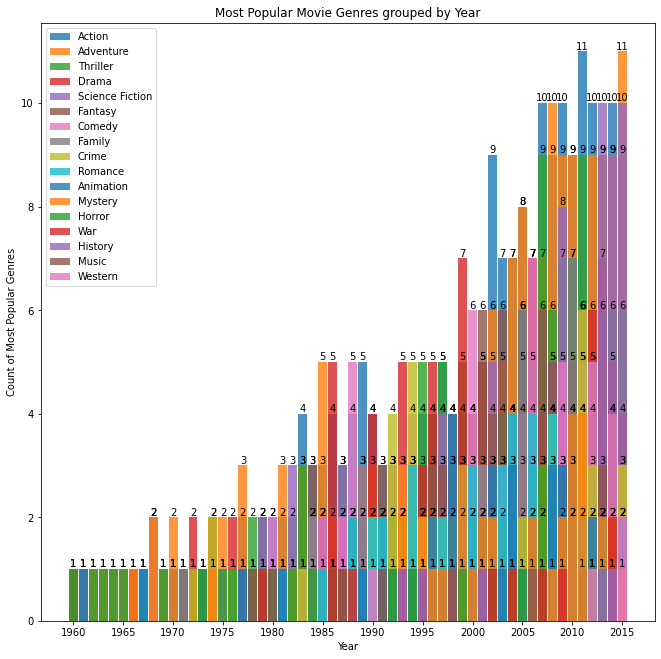

In [62]:
groups = df4[['release_year','genres']].value_counts()
x_val = np.arange(df4.release_year.min(), df4.release_year.max()+1)
width = 0.9
# x.value_counts()
f = plt.figure(figsize=(11,11))
for i in df4.genres.value_counts().keys():
#     i = 'Action'
    y = []
    for j in x_val :
        if (groups[j].keys()==i).any():
            y.append(groups[j][i])
        else:
            y.append(0)
    
    plt.bar(x_val, y, label=i, width =width, alpha = 0.8)
    #Add Bar Labels (Solution)
    for i in range(len(y)):
        if y[i] > 0 : plt.annotate(str(y[i]), xy=(x_val[i],y[i]), ha='center', va='bottom') 


plt.xticks(np.arange(df4.release_year.min(), df4.release_year.max()+1,5))  
plt.title('Most Popular Movie Genres grouped by Year')
plt.xlabel('Year')
plt.ylabel('Count of Most Popular Genres')
# plt.

plt.legend();

From the graph we see the popularity of the horror / thriller genres as dominant from the 1960s - 1980s, then an increase in popularity of science fiction around 2010s

We also see that the mystery / adventure genre is well represented across all periods

---


### 3. How does having a homepage affect popularity?

In [ ]:
# dfx = df[df.homepage.isnull()]

plt.scatter(df.popularity, df.homepage.apply(lambda x : 0 if str(x)=='nan' else 1) ,linewidths=5)
plt.xlabel('Popularity')
plt.ylabel('Has homepage')
# plt.xticks(np.arange(df.budget_all.min(), df.budget_all.max()+1, 100000000))
plt.yticks(np.arange(0,1.1), ['No', 'Yes']);
plt.title('Popularity by Homepage');

The graph shows that movies that have a homepage go on to become more popular

## Conclusions

The analysis set out to answer 3 simple questions 
1. How does movie budget correlate with commercial performance of the movie?
2. Which genre of movies are most popular year on year?
3. How does having a homepage affect popularity?

> 1. Through analysing the data, the following findings were arrived at:
A positive, albeit weak correlation was found between the movie budget and the commercial performance of the movie. 

>2. Also, the findings showed the popularity of the horror / thriller genres as dominant from the 1960s - 1980s, with an increase in popularity of science fiction around 2010s
Furthermore, the mystery / adventure genre is seen to be well represented across all periods


>3. Finally, we can also see that movies with a homepage are more likely to be more popular than movies without a homepage through a brief analysis of the relationship between popularity and availability of homepage.


**Limitations to analysis**

>The analysis takes into account some limitations to accurate conclusions due to missing data on budget and revenue. 

>The missing data within the dataset accounted for more than half of the dataset. Due to the importance of the revenue feature, the records with missing data on revenue had to be dropped, reducing the data set to less than half its size. To prevent more loss of records, records with missing budgets had to be filled according to the popularity rating of the movie


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])